In [2]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sp

In [3]:
#1.1 indicator=1 if mother drank alcohol during pregnancy
#1.2 total number of prenatal visits
#1.3 indicator =1 if mother is unmarried

In [4]:
df =  pd.read_csv('bw_smoking.csv')

In [5]:
model = smf.ols(formula = 'birthweight ~ smoker', data=df)
results = model.fit(cov_type = 'HC1')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            birthweight   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     89.21
Date:                Mon, 26 Jul 2021   Prob (F-statistic):           6.90e-21
Time:                        02:10:50   Log-Likelihood:                -23364.
No. Observations:                3000   AIC:                         4.673e+04
Df Residuals:                    2998   BIC:                         4.674e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3432.0600     11.891    288.638      0.0

In [6]:
model = smf.ols(formula = 'birthweight ~ smoker + alcohol', data=df)
results = model.fit(cov_type = 'HC1')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            birthweight   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     44.75
Date:                Mon, 26 Jul 2021   Prob (F-statistic):           7.05e-20
Time:                        02:10:50   Log-Likelihood:                -23364.
No. Observations:                3000   AIC:                         4.673e+04
Df Residuals:                    2997   BIC:                         4.675e+04
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3432.7032     11.940    287.506      0.0

In [7]:
model = smf.ols(formula = 'birthweight ~ smoker + alcohol + nprevist + unmarried', data=df)
results = model.fit(cov_type = 'HC1')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            birthweight   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     56.09
Date:                Mon, 26 Jul 2021   Prob (F-statistic):           1.11e-45
Time:                        02:10:50   Log-Likelihood:                -23268.
No. Observations:                3000   AIC:                         4.655e+04
Df Residuals:                    2995   BIC:                         4.658e+04
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3134.4000     44.149     70.997      0.0

In [8]:
#7. smoker1=-253.2284 smoker2=-250.8034 alcohol2=-57.6013 
np.cov(df['smoker'],df['alcohol'])

array([[0.15641614, 0.00658486],
       [0.00658486, 0.01896588]])

In [9]:
# There is evidence of omitted variable bias in the negative direction 
# B2=-57.6013 and the variance and covariance are 
# both positive numbers. Therefore OVB is negative

In [10]:
model_f = smf.ols(formula = 'birthweight ~ alcohol + nprevist + unmarried', data=df)
results_f = model_f.fit(cov_type = 'HC1')
hypotheses = '(alcohol = nprevist = unmarried = 0)'
ftest = results_f.f_test(hypotheses)
print(ftest)

<F test: F=array([[58.69368362]]), p=7.25860377424544e-37, df_denom=3e+03, df_num=3>


In [11]:
# the p-value is pretty much 0 so we reject the null hypothesis

In [12]:
# Current Population Survey Part 2

In [13]:
#1.1 wage = earnings per hour 
#1.2 educ = years of education
#1.3 age = years of age

In [14]:
df1 = pd.read_csv('cps.csv')

In [15]:
df1['pexp'] = df1['age'] - df1['educ'] - 7
df1.head()

,wage,educ,age,exper,female,black,white,married,union,northeast,midwest,south,west,fulltime,metro,pexp
0,1.05,12,37,19,0,0,1,0,1,0,0,0,1,1,1,18
1,1.05,13,42,23,0,0,1,0,0,1,0,0,0,1,1,22
2,1.23,8,54,40,0,0,1,0,0,0,0,0,1,1,1,39
3,1.28,10,59,43,1,0,1,1,1,1,0,0,0,0,1,42
4,1.34,18,28,4,1,0,1,0,0,0,0,0,1,1,0,3


In [16]:
df1['pexp2'] = df1['pexp']**2
df1.head()

,wage,educ,age,exper,female,black,white,married,union,northeast,midwest,south,west,fulltime,metro,pexp,pexp2
0,1.05,12,37,19,0,0,1,0,1,0,0,0,1,1,1,18,324
1,1.05,13,42,23,0,0,1,0,0,1,0,0,0,1,1,22,484
2,1.23,8,54,40,0,0,1,0,0,0,0,0,1,1,1,39,1521
3,1.28,10,59,43,1,0,1,1,1,1,0,0,0,0,1,42,1764
4,1.34,18,28,4,1,0,1,0,0,0,0,0,1,1,0,3,9


In [17]:
df1['lnwage'] = np.log(df1['wage'])
df1.head()

,wage,educ,age,exper,female,black,white,married,union,northeast,midwest,south,west,fulltime,metro,pexp,pexp2,lnwage
0,1.05,12,37,19,0,0,1,0,1,0,0,0,1,1,1,18,324,0.048790
1,1.05,13,42,23,0,0,1,0,0,1,0,0,0,1,1,22,484,0.048790
2,1.23,8,54,40,0,0,1,0,0,0,0,0,1,1,1,39,1521,0.207014
3,1.28,10,59,43,1,0,1,1,1,1,0,0,0,0,1,42,1764,0.246860
4,1.34,18,28,4,1,0,1,0,0,0,0,0,1,1,0,3,9,0.292670


In [18]:
model = smf.ols(formula = 'lnwage ~ educ', data=df1)
results = model.fit(cov_type = 'HC1')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 lnwage   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     1113.
Date:                Mon, 26 Jul 2021   Prob (F-statistic):          2.69e-219
Time:                        02:10:52   Log-Likelihood:                -3348.9
No. Observations:                4733   AIC:                             6702.
Df Residuals:                    4731   BIC:                             6715.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7705      0.042     18.170      0.0

In [19]:
model = smf.ols(formula = 'lnwage ~ educ + pexp', data=df1)
results = model.fit(cov_type = 'HC1')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 lnwage   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     862.7
Date:                Mon, 26 Jul 2021   Prob (F-statistic):          3.83e-320
Time:                        02:10:52   Log-Likelihood:                -3159.7
No. Observations:                4733   AIC:                             6325.
Df Residuals:                    4730   BIC:                             6345.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4379      0.042     10.385      0.0

In [28]:
model = smf.ols(formula = 'lnwage ~ educ + pexp + pexp2', data=df1)
results = model.fit(cov_type = 'HC1')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 lnwage   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     704.2
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        02:14:18   Log-Likelihood:                -3065.9
No. Observations:                4733   AIC:                             6140.
Df Residuals:                    4729   BIC:                             6166.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3562      0.041      8.585      0.0

In [21]:
#8. educ1=0.1049 educ2= 0.1136 pexp2=0.0121
np.cov(df1['educ'], df1['pexp'])

array([[  5.55121386,  -3.98076003],
       [ -3.98076003, 130.13337247]])

In [22]:
# There is evidence of omitted variable bias in the positive direction as 
# education increases with the addition of pexp
# The sign of the ovb is - as B2 is + and the covariance is -, 
# while the the variance is +.

In [23]:
model_f = smf.ols(formula = 'lnwage ~ pexp + pexp2', data=df1)
results_f = model_f.fit(cov_type = 'HC1')
hypotheses = '(pexp = pexp2 = 0)'
ftest = results_f.f_test(hypotheses)
print(ftest)

<F test: F=array([[283.170036]]), p=6.977215326443173e-117, df_denom=4.73e+03, df_num=2>


In [26]:
df1['educ_w'] = df1['educ']*df1['white']
df1.head()

,wage,educ,age,exper,female,black,white,married,union,northeast,midwest,south,west,fulltime,metro,pexp,pexp2,lnwage,educ_w
0,1.05,12,37,19,0,0,1,0,1,0,0,0,1,1,1,18,324,0.048790,12
1,1.05,13,42,23,0,0,1,0,0,1,0,0,0,1,1,22,484,0.048790,13
2,1.23,8,54,40,0,0,1,0,0,0,0,0,1,1,1,39,1521,0.207014,8
3,1.28,10,59,43,1,0,1,1,1,1,0,0,0,0,1,42,1764,0.246860,10
4,1.34,18,28,4,1,0,1,0,0,0,0,0,1,1,0,3,9,0.292670,18


In [30]:
model = smf.ols(formula = "lnwage ~ educ + white + educ_w", data = df1)
results = model.fit(cov_type = 'HC1')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 lnwage   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     387.3
Date:                Mon, 26 Jul 2021   Prob (F-statistic):          5.86e-225
Time:                        02:15:33   Log-Likelihood:                -3331.9
No. Observations:                4733   AIC:                             6672.
Df Residuals:                    4729   BIC:                             6698.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6230      0.163      3.831      0.0

In [31]:
# White people may have slightly lower return on eduaction, but the number is small 
# enough that it seems as though it is not statistically significant

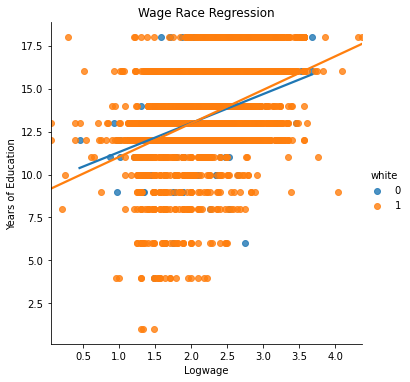

In [33]:
sns.lmplot(x="lnwage", y="educ", hue = "white", ci= None, data=df1)
plt.xlabel('Logwage')
plt.ylabel('Years of Education')
plt.title('Wage Race Regression')
plt.show()